In [637]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [638]:
df1 = pd.read_excel('C:\ENDG 319\Cure3\Music_Data.xlsx')
df = df1.drop(columns = ['Age', 'Number_of_Previous_Injuries', 'Instrument_Type'])

In [639]:
dfx = df
sy = df1.Performance_Level

In [640]:
from sklearn.model_selection import train_test_split
dfx_train,dfx_test, sy_train, sy_test = train_test_split(dfx, sy)

In [641]:
dfx_train,dfx_test, sy_train, sy_test;

In [642]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [643]:
le = le.fit(sy_train)
le.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [644]:
y_train = le.transform(sy_train)
sy_train, y_train;

In [645]:
dfx_train.to_numpy();

In [646]:
n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(dfx_train.to_numpy())
x_train = n1.transform(dfx_train.to_numpy())
x_train;

In [647]:
x_train.shape

(112, 3)

In [648]:
from sklearn.neighbors import KNeighborsClassifier

test = []
train = []
i = 1
while i < 13 :

    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(x_train,y_train)
    y_test = le.transform(sy_test.to_numpy())
    x_test = n1.transform(dfx_test.to_numpy())
    knn.predict(x_test)
    
    a = knn.score(x_test,y_test)
    b = knn.score(x_train,y_train)

    test.append(a)
    train.append(b)
    i += 1
    

In [649]:
test

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

In [650]:
train

[1.0,
 0.9821428571428571,
 0.9732142857142857,
 0.9642857142857143,
 0.9553571428571429,
 0.9464285714285714,
 0.9642857142857143,
 0.9553571428571429,
 0.9642857142857143,
 0.9732142857142857,
 0.9642857142857143,
 0.9642857142857143]

In [651]:
i = 1
count = []
while i < 13:
    count.append(i)
    i += 1


In [652]:
y_test

array([3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 4, 3, 1, 0, 4, 1, 2, 2, 2, 2, 4, 1,
       4, 1, 3, 0, 0, 0, 0, 0, 4, 4, 3, 0, 2, 1, 3, 2], dtype=int64)

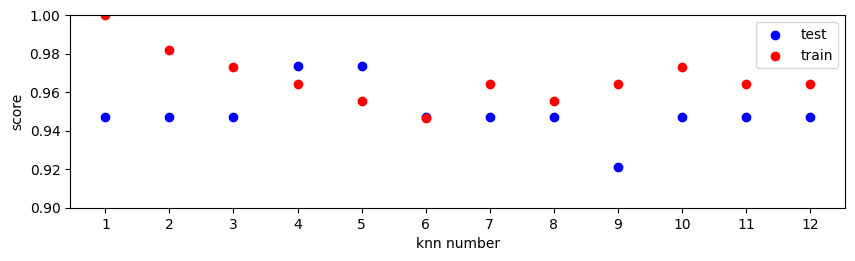

In [653]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,2.5))
axs.scatter(count, test, c = 'blue', label = 'test')
axs.scatter(count, train, c = 'red', label = 'train')
axs.set_xticks(count)
axs.set_ylim(0.9,1)
axs.set_xlabel('knn number')
axs.set_ylabel('score')
axs.legend()

In [ ]:

## For Minmax scalar the best k value is 5